In [12]:
import csv
import numpy as np
data = []

with open ("essays.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

data.pop(0)
data = np.array(data)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
X = data[:,1]
y_E = data[:, 2]
y_N = data[:, 3]
y_A = data[:, 4]
y_C = data[:, 5]
y_O = data[:, 6]

y_E = np.where(y_E == 'y', 1, 0)
y_N = np.where(y_N == 'y', 1, 0)
y_A = np.where(y_A == 'y', 1, 0)
y_C = np.where(y_C == 'y', 1, 0)
y_O = np.where(y_O == 'y', 1, 0)

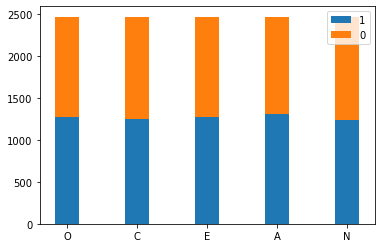

In [16]:
import matplotlib.pyplot as plt

labels = ['O', 'C', 'E', 'A', 'N']
jedinice = [np.sum(y_O), np.sum(y_C), np.sum(y_E), np.sum(y_A), np.sum(y_N)]
nule = [len(y_O)-np.sum(y_O), len(y_O)-np.sum(y_C), len(y_O)-np.sum(y_E), len(y_O)-np.sum(y_A), len(y_O)-np.sum(y_N)]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, jedinice, width, label='1')
ax.bar(labels, nule, width, bottom=jedinice,
       label='0')

ax.legend()

plt.show()

In [5]:
X_ngrams = []
with open("ngrams.txt", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        X_ngrams.append(row)

In [4]:
len(X_ngrams)

2467

In [6]:
class OneHot:
    def __init__(self, docs):
        self.stoi = {}
        self.itos = {}
        count = 0
        for doc in docs:
            for ngram in doc:
                if ngram not in self.stoi:
                    self.stoi[ngram] = count
                    self.itos[count] = ngram
                    count += 1
        self.n = count
    def encode(self, X):
        encoded_X = []
        for x in X:
            one_hot = [0 for _ in range(self.n)]
            for ngram in x:
                if ngram in self.stoi:
                    one_hot[self.stoi[ngram]] = 1
            encoded_X.append(one_hot)
        return encoded_X

In [7]:
encoder = OneHot(X_ngrams)

In [8]:
X_onehot = encoder.encode(X_ngrams) 

In [9]:
class CijeliModel:
    def __init__(self, modeli):
        self.O = modeli[0]
        self.C = modeli[1]
        self.E = modeli[2]
        self.A = modeli[3]
        self.N = modeli[4]
        self.modeli = modeli
    def __iter__(self):
        return self.modeli
    def __getitem__(self, key):
        return self.modeli[key]
    def predict(self, X):
        pred_O = self.O.predict(X)
        pred_C = self.C.predict(X)
        pred_E = self.E.predict(X)
        pred_A = self.A.predict(X)
        pred_N = self.N.predict(X)
        return np.concatenate((pred_O,pred_C,pred_E,pred_A,pred_N), axis=1)

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Koje važnosti značajkama daju koji modeli

In [11]:
#Stabla odluke
Y = [y_O,y_C,y_E,y_A,y_N]
Y_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
models = []
for i in range(len(Y)):
    model = DecisionTreeClassifier(max_depth=10).fit(X_onehot, Y[i])
    models.append(model)
stabla_odluke = CijeliModel(models)

Openness: f1-score=0.597812879708384, accuracy=0.553306342780027\
Conscientiousness: f1-score=0.4781954887218045, accuracy=0.5317139001349528\
Extraversion: f1-score=0.5310880829015544, accuracy=0.5114709851551957\
Agreeableness: f1-score=0.608604407135362, accuracy=0.4966261808367072\
Neuroticism: f1-score=0.4054982817869416, accuracy=0.5330634278002699\

In [12]:
importance = np.array(model.feature_importances_)

In [13]:
top = np.argsort(importance)
top

array([    0, 60574, 60573, ...,   122,  1221,   254], dtype=int64)

In [14]:
len(importance[importance>0.])

84

In [11]:
#Logistička regresija
Y = [y_O,y_C,y_E,y_A,y_N]
Y_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
models = []
for i in range(len(Y)):
    model = LogisticRegression().fit(X_onehot, Y[i])
    models.append(model)
logisticka_regresija = CijeliModel(models)

Openness: f1-score=0.613965744400527, accuracy=0.6045883940620783\
Conscientiousness: f1-score=0.5520833333333334, accuracy=0.5357624831309041\
Extraversion: f1-score=0.5732484076433121, accuracy=0.5479082321187584\
Agreeableness: f1-score=0.5686032138442522, accuracy=0.5290148448043185\
Neuroticism: f1-score=0.5487465181058496, accuracy=0.562753036437247\

In [18]:
from scipy.stats import pearsonr

In [20]:
Y_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
for i in range(len(Y_names)):
    print(Y_names[i]+" korelacija:")
    importance_DT = np.array(stabla_odluke[i].feature_importances_)
    importance_LR = np.abs(np.array(logisticka_regresija[i].coef_[0]))
    korelacija, p_vrijednost = pearsonr(importance_LR,importance_DT)
    print("\tkoeficjent korelacije =", korelacija)
    print("\tp-vrijednost =", p_vrijednost)
    importance = np.array(logisticka_regresija[i].coef_[0])
    bitne_rijeci = np.argsort(importance)
    print("Najbitniji ngrami za " + Y_names[i] + ":")
    for j in range(5):
        index = bitne_rijeci[-(j+1)]
        print("\t",encoder.itos[index] , "->", importance[index])
    print("Najbitniji ngrami protiv " + Y_names[i] + ":")
    for j in range(5):
        index = bitne_rijeci[j]
        print("\t",encoder.itos[index] , "->", importance[index])
    print()

Openness korelacija:
	koeficjent korelacije = 0.13793381136870003
	p-vrijednost = 0.0
Najbitniji ngrami za Openness:
	 cat -> 0.7863783733994539
	 member -> 0.6199384258670291
	 extreme -> 0.5940865505391508
	 crazy -> 0.5839505544540217
	 text -> 0.5709634014157874
Najbitniji ngrami protiv Openness:
	 forever -> -0.7861377226017284
	 compare -> -0.7714251798759652
	 bathroom -> -0.7130516100215245
	 rest -> -0.6574413369705044
	 boyfriend -> -0.6360912105061238

Conscientiousness korelacija:
	koeficjent korelacije = 0.14990587283562104
	p-vrijednost = 0.0
Najbitniji ngrami za Conscientiousness:
	 explain -> 0.6610846544206501
	 tick -> 0.6492118608828717
	 lucky -> 0.5934995228164286
	 separate -> 0.5845456266786928
	 hot -> 0.5782779562464402
Najbitniji ngrami protiv Conscientiousness:
	 got -> -0.6453019260826974
	 wednesday -> -0.6452157123216995
	 chance -> -0.6365555567140053
	 video -> -0.6192719458577369
	 meet new -> -0.6115991024230626

Extraversion korelacija:
	koeficjent ko

# Marijin Reliability test 

In [4]:
import spacy
nlp = spacy.load('en_core_web_md')

In [5]:
def load_data(file):
    f = open(file, "r", encoding="utf8")
    lines = f.read()
    vectors = lines.split("\n")
    f.close()
    data = []
    i = 0
    for vector in vectors:
        data.append(list(map(float, vector.split(","))))
    
    return np.array(data)

X_filtered_vectorized = load_data("data.txt")

In [9]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [25]:
#Logistička regresija
Y = [y_O,y_C,y_E,y_A,y_N]
Y_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
optimal_models = [LogisticRegression(),SVC(),SVC(),SVC(),SVC(kernel="linear")]
trained_models = []
Y_tests = []
for i in range(len(Y)):
    X_train, X_test, y_train, y_test = train_test_split(X_filtered_vectorized, Y[i], test_size=0.3, random_state=2021)
    Y_tests.append(y_test)
    model = optimal_models[i].fit(X_train, y_train)
    trained_models.append(model)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    acc = accuracy_score(y_test,preds)
    print(f"{Y_names[i]}: f1-score={f1}, accuracy={acc}")
optimal_models = CijeliModel(trained_models)

Openness: f1-score=0.6355382619974059, accuracy=0.6207827260458839
Conscientiousness: f1-score=0.5695364238410597, accuracy=0.5614035087719298
Extraversion: f1-score=0.6347177848775293, accuracy=0.5371120107962213
Agreeableness: f1-score=0.6504237288135593, accuracy=0.5546558704453441
Neuroticism: f1-score=0.6058201058201059, accuracy=0.5978407557354926


In [26]:
np.sum(Y_tests[2])/len(Y_tests[2])

0.5209176788124157

In [13]:
def is_token_allowed(token):
    if (not token or not token.text.strip() or token.is_stop or token.is_punct or not token.has_vector):
        return False
    return True

def preprocess_token(token):
     # Reduce token to its lowercase lemma form
    return token.lemma_.strip().lower()

In [28]:
_, X_test, _, _ = train_test_split(X, Y[0], test_size=0.3, random_state=2021)
X_test_tokenized = []
for i, x in enumerate(X_test):
    print(f"{i}/{len(X_test)}")
    X_test_tokenized.append(nlp(str(x)))

0/741
1/741
2/741
3/741
4/741
5/741
6/741
7/741
8/741
9/741
10/741
11/741
12/741
13/741
14/741
15/741
16/741
17/741
18/741
19/741
20/741
21/741
22/741
23/741
24/741
25/741
26/741
27/741
28/741
29/741
30/741
31/741
32/741
33/741
34/741
35/741
36/741
37/741
38/741
39/741
40/741
41/741
42/741
43/741
44/741
45/741
46/741
47/741
48/741
49/741
50/741
51/741
52/741
53/741
54/741
55/741
56/741
57/741
58/741
59/741
60/741
61/741
62/741
63/741
64/741
65/741
66/741
67/741
68/741
69/741
70/741
71/741
72/741
73/741
74/741
75/741
76/741
77/741
78/741
79/741
80/741
81/741
82/741
83/741
84/741
85/741
86/741
87/741
88/741
89/741
90/741
91/741
92/741
93/741
94/741
95/741
96/741
97/741
98/741
99/741
100/741
101/741
102/741
103/741
104/741
105/741
106/741
107/741
108/741
109/741
110/741
111/741
112/741
113/741
114/741
115/741
116/741
117/741
118/741
119/741
120/741
121/741
122/741
123/741
124/741
125/741
126/741
127/741
128/741
129/741
130/741
131/741
132/741
133/741
134/741
135/741
136/741
137/741
138/74

In [29]:
X_test_tokenized
X_1 = []
X_2 = []
for i, x in enumerate(X_test_tokenized):
    print(f"{i}/{len(X_test_tokenized)}")
    sentences = [str(sent) for sent in x.sents]
    sent1, sent2 = train_test_split(sentences, test_size=0.5)
    sent1 = " ".join(sent1)
    sent2 = " ".join(sent2)
    sent1 = nlp(sent1)
    sent2 = nlp(sent2)
    sent1_filtered = [preprocess_token(token) for token in sent1 if is_token_allowed(token)]
    sent2_filtered = [preprocess_token(token) for token in sent2 if is_token_allowed(token)]
    sent1_filtered = " ".join(sent1_filtered)
    sent2_filtered = " ".join(sent2_filtered)
    sent1 = nlp(sent1_filtered)
    sent2 = nlp(sent2_filtered)
    X_1.append(sent1.vector)
    X_2.append(sent2.vector)

0/741
1/741
2/741
3/741
4/741
5/741
6/741
7/741
8/741
9/741
10/741
11/741
12/741
13/741
14/741
15/741
16/741
17/741
18/741
19/741
20/741
21/741
22/741
23/741
24/741
25/741
26/741
27/741
28/741
29/741
30/741
31/741
32/741
33/741
34/741
35/741
36/741
37/741
38/741
39/741
40/741
41/741
42/741
43/741
44/741
45/741
46/741
47/741
48/741
49/741
50/741
51/741
52/741
53/741
54/741
55/741
56/741
57/741
58/741
59/741
60/741
61/741
62/741
63/741
64/741
65/741
66/741
67/741
68/741
69/741
70/741
71/741
72/741
73/741
74/741
75/741
76/741
77/741
78/741
79/741
80/741
81/741
82/741
83/741
84/741
85/741
86/741
87/741
88/741
89/741
90/741
91/741
92/741
93/741
94/741
95/741
96/741
97/741
98/741
99/741
100/741
101/741
102/741
103/741
104/741
105/741
106/741
107/741
108/741
109/741
110/741
111/741
112/741
113/741
114/741
115/741
116/741
117/741
118/741
119/741
120/741
121/741
122/741
123/741
124/741
125/741
126/741
127/741
128/741
129/741
130/741
131/741
132/741
133/741
134/741
135/741
136/741
137/741
138/74

In [16]:
from scipy.stats import chi2_contingency
from sklearn.metrics import matthews_corrcoef, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Openness:
	Matrica:


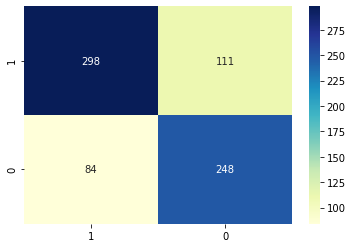

	statistika=164.05806349390397, p-vrijednost=1.4691881068601062e-37
	phi-korelacija = 0.4732476205891723

Conscientiousness:
	Matrica:


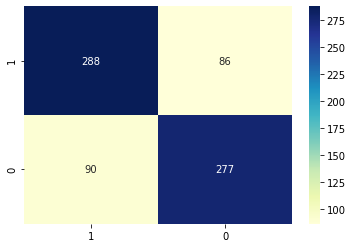

	statistika=202.07025388009433, p-vrijednost=7.380189226211795e-46
	phi-korelacija = 0.5249060080854278

Extraversion:
	Matrica:


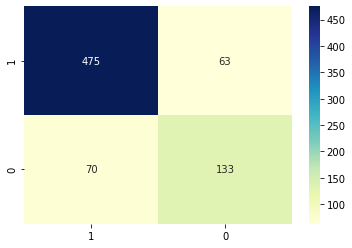

	statistika=216.58641315798275, p-vrijednost=5.023424368953076e-49
	phi-korelacija = 0.544068142522076

Agreeableness:
	Matrica:


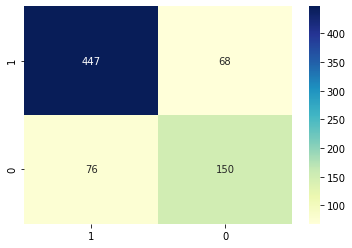

	statistika=211.27932113407547, p-vrijednost=7.223673982847162e-48
	phi-korelacija = 0.5371893773635824

Neuroticism:
	Matrica:


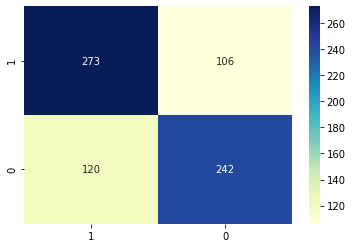

	statistika=110.82781267729122, p-vrijednost=6.453985570516279e-26
	phi-korelacija = 0.38944136002663016



In [30]:
Y_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
for i in range(len(Y_names)):
    print(Y_names[i]+":")
    preds1 = optimal_models[i].predict(X_1)
    preds2 = optimal_models[i].predict(X_2)
    matrix = confusion_matrix(preds1, preds2, labels=[1,0])
    print("\tMatrica:")
    sns.heatmap(matrix, cmap="YlGnBu", xticklabels=["1","0"], yticklabels=["1","0"], annot=True, fmt="d")
    plt.show()
    statistika, p_vrijednost, _,_ = chi2_contingency(matrix)
    print(f"\tstatistika={statistika}, p-vrijednost={p_vrijednost}")
    print(f"\tphi-korelacija = {matthews_corrcoef(preds1,preds2)}")
    print()

# Jel bolji od slucajnog

In [40]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [41]:
def load_data(file):
    f = open(file, "r", encoding="utf8")
    lines = f.read()
    vectors = lines.split("\n")
    f.close()
    data = []
    i = 0
    for vector in vectors:
        data.append(list(map(float, vector.split(","))))
    
    return np.array(data)

X_filtered_vectorized = load_data("data.txt")

In [42]:
cv = KFold(n_splits=10,shuffle=True, random_state=0)

In [43]:
modeli = [LogisticRegression(),SVC(),SVC(),SVC(),SVC(kernel="linear")]
Y_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
Y = [y_O,y_C,y_E,y_A,y_N]
for i in range(len(Y)):
    print(Y_names[i]+":")
    lr = modeli[i]
    rc = DummyClassifier(strategy="stratified")
    cv_results_lr = cross_validate(lr, X_filtered_vectorized, Y[i], cv=cv, scoring=("accuracy","f1"))
    cv_results_rc = cross_validate(rc, X_filtered_vectorized, Y[i], cv=cv, scoring=("accuracy","f1"))
    print("\tLogisticka Regresija:")
    print(f"\t\tf1: {cv_results_lr['test_f1']}")
    print(f"\t\taccuracy: {cv_results_lr['test_accuracy']}")
    print("\tSlucajni Odabir:")
    print(f"\t\tf1: {cv_results_rc['test_f1']}")
    print(f"\t\taccuracy: {cv_results_rc['test_accuracy']}")
    print("\tStatistika:")
    statistika, p_vrijednost = ttest_ind(cv_results_lr["test_f1"], cv_results_rc["test_f1"], alternative="greater", equal_var=False)
    print(f"\t\tf1 -> statistika={statistika}, p-vrijednost={p_vrijednost}")
    statistika, p_vrijednost = ttest_ind(cv_results_lr["test_accuracy"], cv_results_rc["test_accuracy"], alternative="greater")
    print(f"\t\taccuracy -> statistika={statistika}, p-vrijednost={p_vrijednost}")
    print()

Openness:
	Logisticka Regresija:
		f1: [0.66938776 0.62548263 0.62453532 0.6171875  0.66153846 0.66141732
 0.68461538 0.62357414 0.59922179 0.66935484]
		accuracy: [0.67206478 0.60728745 0.59109312 0.60323887 0.6437247  0.65182186
 0.66801619 0.59756098 0.58130081 0.66666667]
	Slucajni Odabir:
		f1: [0.52       0.54098361 0.53333333 0.50381679 0.50965251 0.52964427
 0.5509434  0.49411765 0.44537815 0.44534413]
		accuracy: [0.51417004 0.5465587  0.51821862 0.47368421 0.48582996 0.51821862
 0.51821862 0.47560976 0.46341463 0.44308943]
	Statistika:
		f1 -> statistika=9.22468393929559, p-vrijednost=2.52601162084243e-08
		accuracy -> statistika=8.76117611822025, p-vrijednost=3.280401440891132e-08

Conscientiousness:
	Logisticka Regresija:
		f1: [0.60536398 0.57039711 0.58365759 0.55598456 0.63703704 0.61254613
 0.5648855  0.6484375  0.60465116 0.56704981]
		accuracy: [0.58299595 0.51821862 0.56680162 0.53441296 0.60323887 0.57489879
 0.53846154 0.63414634 0.58536585 0.54065041]
	Slucajni Od

# Model selection

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [22]:
Y = np.concatenate((y_O.reshape(-1,1),y_C.reshape(-1,1),y_E.reshape(-1,1),y_A.reshape(-1,1),y_N.reshape(-1,1)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_vectorized,Y, test_size=0.2, random_state=0)
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [27]:
modeli = [LogisticRegression(),SVC(),SVC(kernel="linear")]
Y_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
model_names = ["LR","RBF_SVC","Linear_SVC"]

In [33]:
for i in range(5):
    print(Y_names[i]+":")
    for j in range(len(modeli)):
        results = cross_validate(modeli[j], X_train, y_train[:,i], cv=cv, scoring=("f1"))
        print(f"\t{model_names[j]} -> f1 = {results['test_score'].mean()}")

Openness:
	LR -> f1 = 0.648610843701964
	RBF_SVC -> f1 = 0.6368020714006954
	Linear_SVC -> f1 = 0.6284397166488154
Conscientiousness:
	LR -> f1 = 0.5942819679651558
	RBF_SVC -> f1 = 0.6042566680897867
	Linear_SVC -> f1 = 0.592149128291511
Extraversion:
	LR -> f1 = 0.5961956034611495
	RBF_SVC -> f1 = 0.642203500784418
	Linear_SVC -> f1 = 0.609455832547226
Agreeableness:
	LR -> f1 = 0.6279626495194351
	RBF_SVC -> f1 = 0.6666238470477532
	Linear_SVC -> f1 = 0.6249390745315074
Neuroticism:
	LR -> f1 = 0.6053479023775201
	RBF_SVC -> f1 = 0.5958608956668134
	Linear_SVC -> f1 = 0.6064643810627672


In [39]:
modeli = [LogisticRegression(),SVC(),SVC(),SVC(),SVC(kernel="linear")]
for i, name in enumerate(Y_names):
    model = modeli[i].fit(X_train, y_train[:,i])
    preds = model.predict(X_test)
    print(f"{name} test f1-score = {f1_score(preds,y_test[:,i])}")

Openness test f1-score = 0.6456692913385826
Conscientiousness test f1-score = 0.5985401459854014
Extraversion test f1-score = 0.63125
Agreeableness test f1-score = 0.6687306501547987
Neuroticism test f1-score = 0.5772357723577236
